# SVM-HingeLoss-SGD

Hi!
This is simple implementation of SVM with tuple (HingeLoss, SGD) for training.


## About the implementation

### Gradient formula

Our loss function:

$$ \mathbb{L}(w) = \sum_{i=0}^{BS}max\{0, 1-y_{predicted} y_{true}\} + \frac{\lambda}{2}\sum_{k=0}^{FS} w_k^2 $$

, where $BS$ - batch size, $FS$ - feature size, $y_{predicted} = xw + b$, $y_\{true\} = \pm1$

Let's find $\frac{\partial \mathbb{L}}{\partial w_k}$:

$$\frac{\partial \mathbb{L}}{\partial w_k} = 0, if: y_{true} y_{predicted} > 1$$
$$\frac{\partial \mathbb{L}}{\partial w_k} = -y_{true} x_k, if: y_{true} y_{predicted} < 1$$

Also we need to figure out $\frac{\partial \mathbb{L}}{\partial b}$:
$$\frac{\partial \mathbb{L}}{\partial b} = 0, if: y_{true} y_{predicted} > 1$$
$$\frac{\partial \mathbb{L}}{\partial b} = -y_{true}, if: y_{true} y_{predicted} < 1$$

### Initial statement

Initial statement is random. In this case, there is a probability of lack of convergence.

## Let's start

Libs which we are need

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

from SVM import SVM

Simple data which we are need

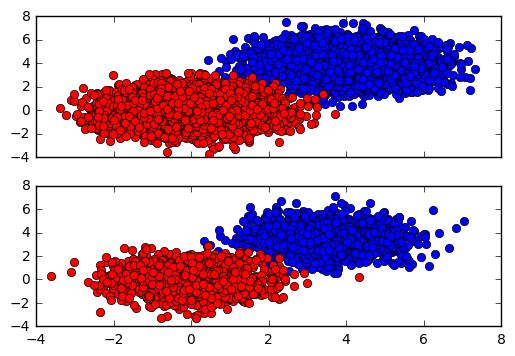

In [8]:
N_train, N_test = 10000, 3000
X_train = np.zeros([N_train, 2])
y_train = np.zeros(N_train)
X_test  = np.zeros([N_test, 2])
y_test  = np.zeros(N_test)

# feel free to change this parameter, this will affect  --->
# ---> interesection of the sets
Const = 4.0

# this parameter will affect difference between train and test sets
eps   = 0.5
for i in range(N_train / 2):
    X_train[i] = np.random.randn(2) + Const
    y_train[i] = 1.0
    X_train[N_train / 2 + i] = np.random.randn(2)
    y_train[N_train / 2 + i] = -1

for i in range(N_test / 2):
    X_test[i] = np.random.randn(2) + Const - eps
    y_test[i] = 1.0
    X_test[N_test / 2 + i] = np.random.randn(2)
    y_test[N_test / 2 + i] = -1
    
fig, sub = plt.subplots(2, sharex=True)

sub[0].plot(X_train[:N_train/2, 0], X_train[:N_train/2, 1], 'bo')
sub[0].plot(X_train[N_train/2 :, 0], X_train[N_train/2:, 1], 'ro')

sub[1].plot(X_test[:N_test/2, 0], X_test[:N_test/2, 1], 'bo')
sub[1].plot(X_test[N_test/2 :, 0], X_test[N_test/2:, 1], 'ro')

plt.show()

Let's define a simple all-in-one function with one parameter - batch_size

In [23]:
def run(batch_size, output = True):
    if output:
        print 'Batch Size:', batch_size
    
    # you can increase this to achieve higher results
    N_EPOCH = 10
    
    model = SVM()
    model.fit(X_train, y_train, X_test, y_test, batch_size = batch_size, n_epoch= N_EPOCH)
    
    prediction = model.predict(X_train)
    if output:
        print 'Train Accuracy:', np.sum(prediction == y_train) / float(y_train.shape[0])
    
    prediction = model.predict(X_test)
    if output:
        print 'Test  Accuracy:', np.sum(prediction == y_test) / float(y_test.shape[0])
    
    history = np.asarray(model.train_loss_history)
    plt.plot(history[1:, 0], 'b--', label='train_loss')
    plt.plot(history[1:, 1], 'r',   label=' test_loss')
    
    legend = plt.legend(loc='upper center', shadow=True)

    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()

    del(model)

Let's check our implementation for different batch sizes

Batch Size: 100
epoch 10, time 0.13s, train_loss 0.231, test_loss 0.259
Train Accuracy: 0.9967
Test  Accuracy: 0.993333333333


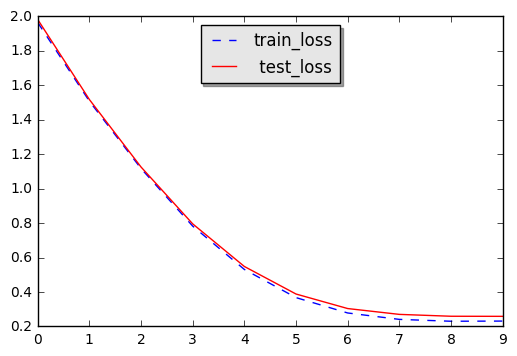

-------------------
Batch Size: 10
epoch 10, time 0.75s, train_loss 0.193, test_loss 0.225
Train Accuracy: 0.9954
Test  Accuracy: 0.993


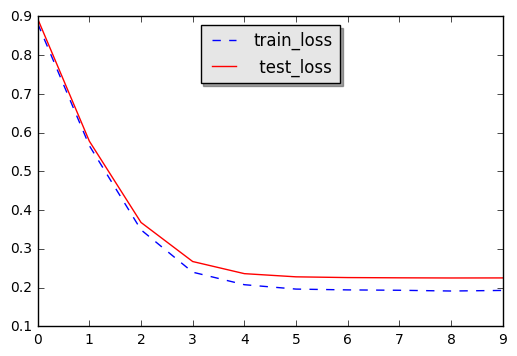

-------------------
Batch Size: 1
epoch 10, time 6.79s, train_loss 0.358, test_loss 0.382
Train Accuracy: 0.9525
Test  Accuracy: 0.958333333333


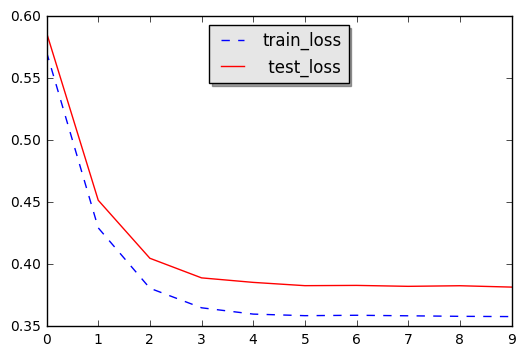

-------------------


In [24]:
batch_size_list = [100, 10, 1]
for batch_size in batch_size_list:
    run(batch_size)
    print '-------------------'

## Evolution of statement

O'kay. Seems like ```bathc_size=100``` - the best choice. Let's look at evolution of the model statement over train epoch. (On the train set)

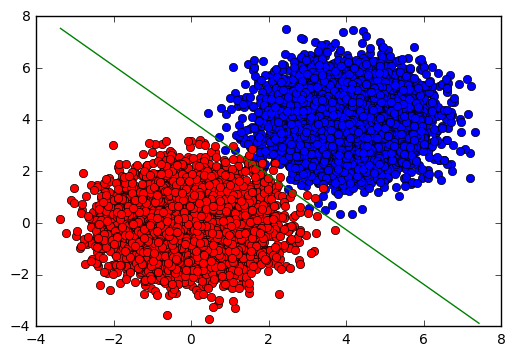

<function __main__.plot_statement>

In [38]:
model = SVM(chronicle_model_history = True)
model.fit(X_train, y_train, X_test, y_test, batch_size = 1000, n_epoch= 50)

history_coef = np.asarray(model.train_model_history)

def plot_statement(ind):
    line_x = np.arange(np.min(X_train[:,0]), np.max(X_train[:,1]), 0.1)
    line_y = line_x * ( - history_coef[ind, 0] / history_coef[ind, 1]) - history_coef[ind, 2] / history_coef[ind, 1]
    # !!! Actually, this line formula (y = kx + b) doesn't work in case of --->
    # ---> vertical line ( x = 0 for example). So, will trust that history_coef[ind,0]!=0



    plt.plot(X_train[:N_train/2, 0], X_train[:N_train/2, 1], 'bo')
    plt.plot(X_train[N_train/2 :, 0], X_train[N_train/2:, 1], 'ro')
    plt.plot(line_x, line_y, 'g')
    plt.show()
    
widgets.interact(plot_statement, ind=(0,len(model.train_model_history)-1,1))

In [ ]:
!ipython nbconvert --to markdown README.ipynb